<a href="https://colab.research.google.com/github/saja13-zh/ML-Bootcamp-SDAIA/blob/main/week1_1_MLBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Data


---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.

## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

After you download the **hotel_bookings.csv** dataset file, upload it to your runtime so you can work with it.

In [ ]:
df =pd.read_csv("/content/hotel_bookings.csv")


# 1. Exploring your data / Diagnosis phase

## 1.1 Question 1: Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the first few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [ ]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
43912,City Hotel,1,35,2015,September,39,25,2,3,2,...,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43913,City Hotel,1,87,2015,September,39,25,2,3,2,...,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43914,City Hotel,1,87,2015,September,39,25,2,3,2,...,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43915,City Hotel,1,87,2015,September,39,25,2,3,2,...,Non Refund,1.0,NaN,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43916,City Hotel,1,87,2015,September,39,25,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43917 entries, 0 to 43916
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43917 non-null  object 
 1   is_canceled                     43917 non-null  int64  
 2   lead_time                       43917 non-null  int64  
 3   arrival_date_year               43917 non-null  int64  
 4   arrival_date_month              43917 non-null  object 
 5   arrival_date_week_number        43917 non-null  int64  
 6   arrival_date_day_of_month       43917 non-null  int64  
 7   stays_in_weekend_nights         43917 non-null  int64  
 8   stays_in_week_nights            43917 non-null  int64  
 9   adults                          43917 non-null  int64  
 10  children                        43913 non-null  float64
 11  babies                          43917 non-null  int64  
 12  meal                            

In [ ]:
df.shape


(43917, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- Missing values in agent, children, country and company columns (We can see that from the non null count)

## 1.2 Exploratory data analysis

### Question 2: Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [ ]:
print(df.isnull().sum())
   # Count of missing values in each column


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       1
deposit_type                          1
agent                              8640
company                           40636


### Question 3: Explore descriptive statistics

In [ ]:
 # Summary statistics for numerical columns
print(df.describe())

        is_canceled     lead_time  arrival_date_year  \
count  43917.000000  43917.000000       43917.000000   
mean       0.280506     88.742150        2016.022952   
std        0.449252     94.683435           0.759415   
min        0.000000      0.000000        2015.000000   
25%        0.000000     10.000000        2015.000000   
50%        0.000000     54.000000        2016.000000   
75%        1.000000    145.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              43917.000000               43917.000000   
mean                  27.816495                  15.758066   
std                   13.581790                   8.793940   
min                    1.000000                   1.000000   
25%                   17.000000                   8.000000   
50%                   30.000000                  16.000000   
75%                   38.000000                  23.000000   

### Question 4: Data Visualization

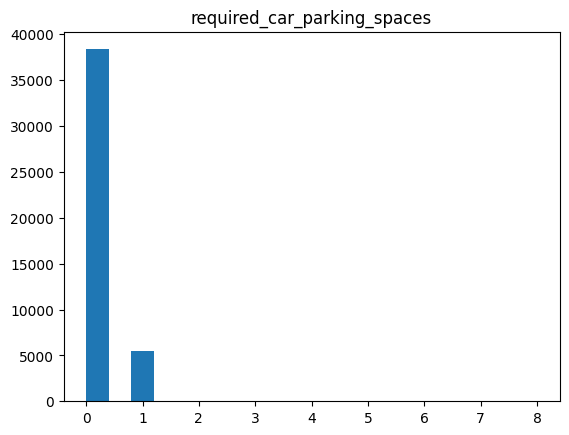

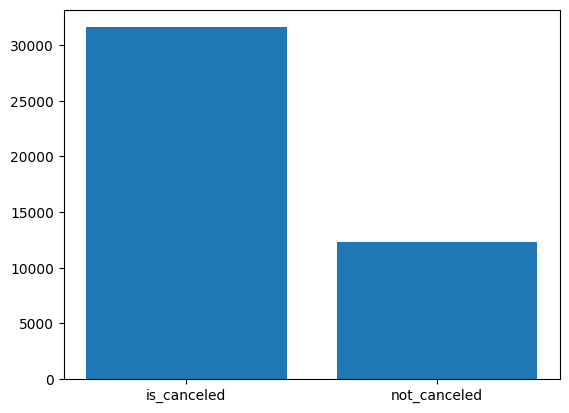

In [ ]:
import matplotlib.pyplot as plt

# Histogram for "required_car_parking_spaces" column

plt.hist(df['required_car_parking_spaces'],20)
plt.title('required_car_parking_spaces')
plt.show()

# Bar plot for "is_canceled" column

c=df['is_canceled'].value_counts()
label=['is_canceled','not_canceled']
plt.bar(label,c)
plt.show()

## 1.3 Cleaning

### Question 5: Handling Missing Values

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Option 1: Remove rows with missing values

df_copy_dropped = df_copy.dropna()


# Option 2: Impute missing values
# Fill missing values with a specific value

df_copy_filled = df_copy.fillna(0)


# Fill missing values with the mean value of the column
df_copy_mean = df_copy.fillna(df_copy.mean())


# Option 3: Drop columns with excessive missing data
# Set a threshold for the percentage of missing values in a column
threshold = 0.5  # Example threshold of 50%
df_copy_dropped_cols = df_copy.dropna(thresh=threshold*len(df_copy), axis=1)

# Print the modified DataFrames
print("DataFrame with dropped rows:\n", df_copy_dropped)
print("DataFrame with filled missing values:\n", df_copy_filled)
print("DataFrame with filled missing values using mean:\n", df_copy_mean)


DataFrame with dropped rows:
               hotel  is_canceled  lead_time  arrival_date_year  \
2392   Resort Hotel            0          6               2015   
2697   Resort Hotel            0         24               2015   
2867   Resort Hotel            0         24               2015   
2877   Resort Hotel            0         24               2015   
2878   Resort Hotel            0         24               2015   
...             ...          ...        ...                ...   
41005    City Hotel            0          0               2015   
41142    City Hotel            0          0               2015   
41144    City Hotel            0          0               2015   
42126    City Hotel            0          1               2015   
43580    City Hotel            0         19               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2392             October                        42                         11   
2697           

<ipython-input-20-679c41c8941b>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_mean = df_copy.fillna(df_copy.mean())


### Data Types

Check Unique Values for df column to know whether column type is correct or not

In [ ]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  hotel  has different values of: 2
Column name  is_canceled  has different values of: 2
Column name  lead_time  has different values of: 412
Column name  arrival_date_year  has different values of: 3
Column name  arrival_date_month  has different values of: 12
Column name  arrival_date_week_number  has different values of: 53
Column name  arrival_date_day_of_month  has different values of: 31
Column name  stays_in_weekend_nights  has different values of: 16
Column name  stays_in_week_nights  has different values of: 31
Column name  adults  has different values of: 14
Column name  children  has different values of: 5
Column name  babies  has different values of: 3
Column name  meal  has different values of: 5
Column name  country  has different values of: 126
Column name  market_segment  has different values of: 7
Column name  distribution_channel  has different values of: 5
Column name  is_repeated_guest  has different values of: 2
Column name  previous_cancellations  has d

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **boolean:** is_canceled, is_repeated_guest
3. **int:** children, agent, company, ...
4. **date:** reservation_status_date

After knowing which columns represent categorical data, let's see the counts of each value in these columns

In [ ]:
df_cat=df[['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']]

for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

Column name is: hotel and its value counts are:
Resort Hotel    40060
City Hotel       3857
Name: hotel, dtype: int64

Column name is: is_canceled and its value counts are:
0    31598
1    12319
Name: is_canceled, dtype: int64

Column name is: arrival_date_month and its value counts are:
August       6472
July         5073
September    4887
April        3609
May          3559
October      3555
March        3336
February     3103
June         3045
December     2648
November     2437
January      2193
Name: arrival_date_month, dtype: int64

Column name is: meal and its value counts are:
BB           32794
HB            8976
Undefined     1169
FB             755
SC             223
Name: meal, dtype: int64

Column name is: country and its value counts are:
PRT    19770
GBR     6855
ESP     4481
IRL     2175
FRA     1932
       ...  
UGA        1
SMR        1
SYR        1
BHR        1
STP        1
Name: country, Length: 126, dtype: int64

Column name is: market_segment and its value counts 

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Question 6: Here's how we change to the category dtype

In [ ]:
#df['Column_name'] = df['Column_name'].astype('category')

df_cat['is_canceled'] = df_cat['is_canceled'].astype('category')

<ipython-input-31-d5212cea9a16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['is_canceled'] = df_cat['is_canceled'].astype('category')


Below, we confirm that the dtype has changed to category:

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43917 entries, 0 to 43916
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   hotel                 43917 non-null  object  
 1   is_canceled           43917 non-null  category
 2   arrival_date_month    43917 non-null  object  
 3   meal                  43917 non-null  object  
 4   country               43453 non-null  object  
 5   market_segment        43917 non-null  object  
 6   distribution_channel  43917 non-null  object  
 7   is_repeated_guest     43917 non-null  int64   
 8   reserved_room_type    43917 non-null  object  
 9   assigned_room_type    43917 non-null  object  
 10  deposit_type          43916 non-null  object  
 11  customer_type         43916 non-null  object  
 12  reservation_status    43916 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 4.1+ MB


## 1.4 Question 7: Feature Correlation

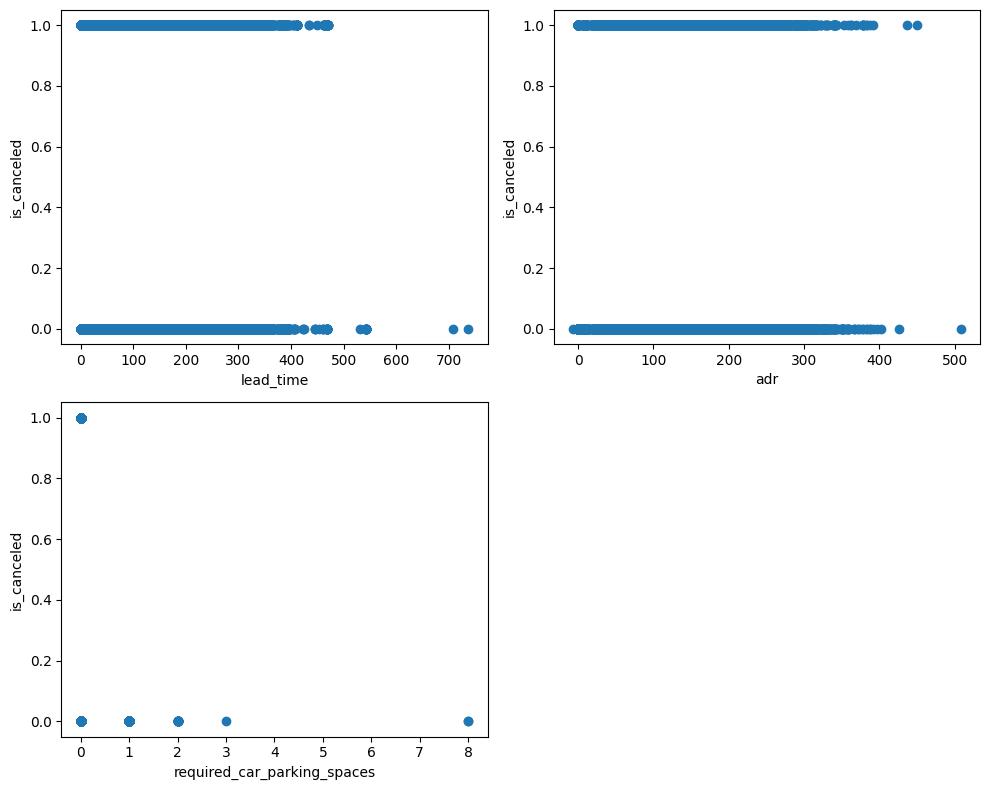

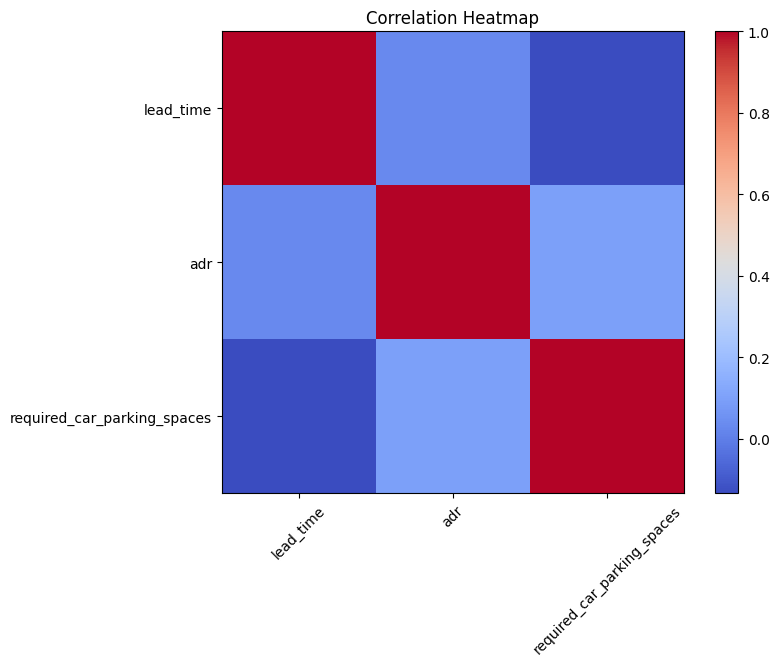

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['lead_time', 'adr', 'required_car_parking_spaces']

# Scatter plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_of_interest):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[column], df['is_canceled'])
    plt.xlabel(column)
    plt.ylabel('is_canceled')
plt.tight_layout()
plt.show()


# Correlation heatmap

correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(columns_of_interest))
plt.xticks(tick_marks, columns_of_interest, rotation=45)
plt.yticks(tick_marks, columns_of_interest)
plt.title('Correlation Heatmap')
plt.show()